
16-QAM Analysis:
----------------------------------------
Bits per symbol: 4
Constellation points per dimension: 4
Minimum distance between points: 0.632
Average symbol energy: 1.000
Average bit energy: 0.250

64-QAM Analysis:
----------------------------------------
Bits per symbol: 6
Constellation points per dimension: 8
Minimum distance between points: 0.309
Average symbol energy: 1.000
Average bit energy: 0.167

256-QAM Analysis:
----------------------------------------
Bits per symbol: 8
Constellation points per dimension: 16
Minimum distance between points: 0.153
Average symbol energy: 1.000
Average bit energy: 0.125


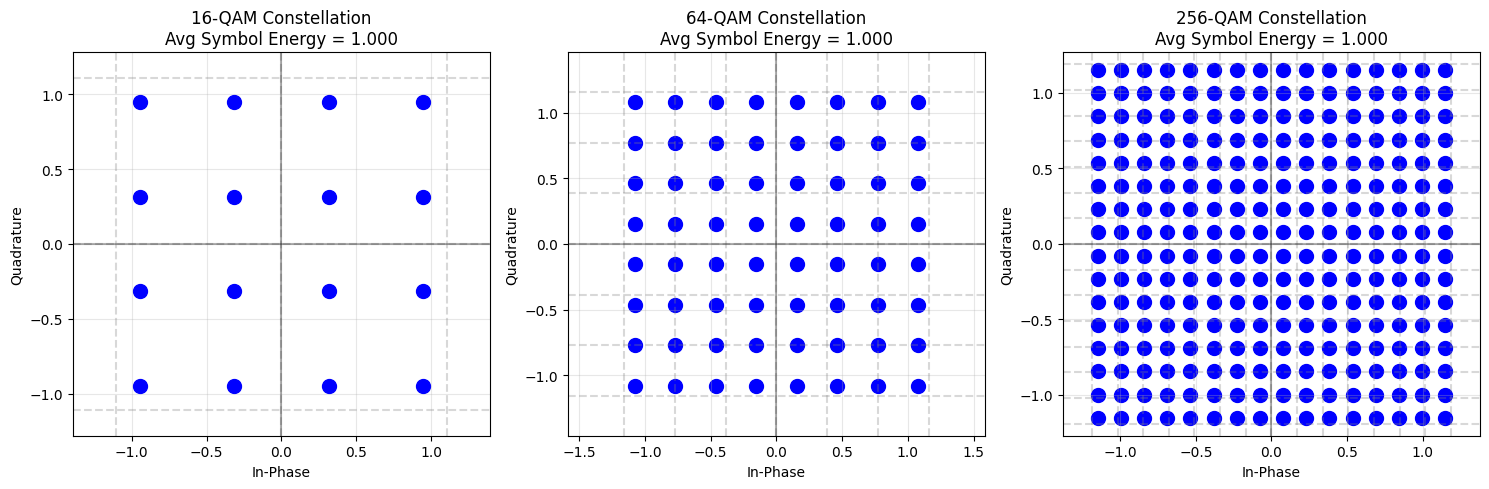


Theoretical Comparison:
----------------------------------------

16-QAM:
Bits per symbol: 4
Minimum distance: 0.632
Peak-to-average power ratio: 5.0
Spectral efficiency: 4 bits/s/Hz

64-QAM:
Bits per symbol: 6
Minimum distance: 0.309
Peak-to-average power ratio: 21.0
Spectral efficiency: 6 bits/s/Hz

256-QAM:
Bits per symbol: 8
Minimum distance: 0.153
Peak-to-average power ratio: 85.0
Spectral efficiency: 8 bits/s/Hz


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_qam_constellation(M):
    """Plot QAM constellation for different M values"""
    # Calculate number of points in each dimension
    k = int(np.sqrt(M))

    # Generate constellation points
    # For normalized average energy = 1
    scale = np.sqrt(3/(2*(M-1)))  # Scale factor for unit average energy

    # Create grid of points
    x = np.linspace(-(k-1), k-1, k) * scale
    y = np.linspace(-(k-1), k-1, k) * scale
    X, Y = np.meshgrid(x, y)

    # Plot constellation
    plt.scatter(X.flatten(), Y.flatten(), c='blue', s=100)

    # Add decision boundaries
    for i in np.linspace(-k+0.5, k-0.5, k-1) * scale:
        plt.axvline(x=i, color='gray', linestyle='--', alpha=0.3)
        plt.axhline(y=i, color='gray', linestyle='--', alpha=0.3)

    # Calculate average symbol energy
    Es = np.mean(X.flatten()**2 + Y.flatten()**2)

    # Add grid and labels
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.xlabel('In-Phase')
    plt.ylabel('Quadrature')

    # Set equal aspect ratio and limits
    plt.axis('equal')
    limit = max(abs(x[0]), abs(x[-1])) * 1.2
    plt.xlim(-limit, limit)
    plt.ylim(-limit, limit)

    plt.title(f'{M}-QAM Constellation\nAvg Symbol Energy = {Es:.3f}')

    # Print analysis
    print(f"\n{M}-QAM Analysis:")
    print("-" * 40)
    print(f"Bits per symbol: {int(np.log2(M))}")
    print(f"Constellation points per dimension: {k}")
    print(f"Minimum distance between points: {2*scale:.3f}")
    print(f"Average symbol energy: {Es:.3f}")
    print(f"Average bit energy: {Es/int(np.log2(M)):.3f}")

# Create figure for different M values
plt.figure(figsize=(15, 5))
for idx, M in enumerate([16, 64, 256], 1):
    plt.subplot(1, 3, idx)
    plot_qam_constellation(M)

plt.tight_layout()
plt.show()

# Print theoretical comparison
M_values = [16, 64, 256]
print("\nTheoretical Comparison:")
print("-" * 40)
for M in M_values:
    k = int(np.sqrt(M))
    scale = np.sqrt(3/(2*(M-1)))
    bits_per_symbol = int(np.log2(M))
    dmin = 2 * scale

    print(f"\n{M}-QAM:")
    print(f"Bits per symbol: {bits_per_symbol}")
    print(f"Minimum distance: {dmin:.3f}")
    print(f"Peak-to-average power ratio: {(M-1)/3:.1f}")
    print(f"Spectral efficiency: {bits_per_symbol} bits/s/Hz")


16-QAM Signal Analysis:
--------------------------------------------------
Basis functions:
φ₁(t) = √(2/T)cos(2πfct)
φ₂(t) = √(2/T)sin(2πfct)

Amplitude levels: [-0.9486832980505138, -0.31622776601683794, 0.31622776601683794, 0.9486832980505138]
Number of bits: 4
Average symbol energy: 1.000
Scale factor: 0.316

Distances:
Minimum distance: 0.632
Maximum distance: 1.897

64-QAM Signal Analysis:
--------------------------------------------------
Basis functions:
φ₁(t) = √(2/T)cos(2πfct)
φ₂(t) = √(2/T)sin(2πfct)

Amplitude levels: [-1.0801234497346435, -0.7715167498104596, -0.4629100498862757, -0.1543033499620919, 0.1543033499620919, 0.4629100498862757, 0.7715167498104596, 1.0801234497346435]
Number of bits: 6
Average symbol energy: 1.000
Scale factor: 0.154

Distances:
Minimum distance: 0.309
Maximum distance: 2.160

256-QAM Signal Analysis:
--------------------------------------------------
Basis functions:
φ₁(t) = √(2/T)cos(2πfct)
φ₂(t) = √(2/T)sin(2πfct)

Amplitude levels: [-1.15044

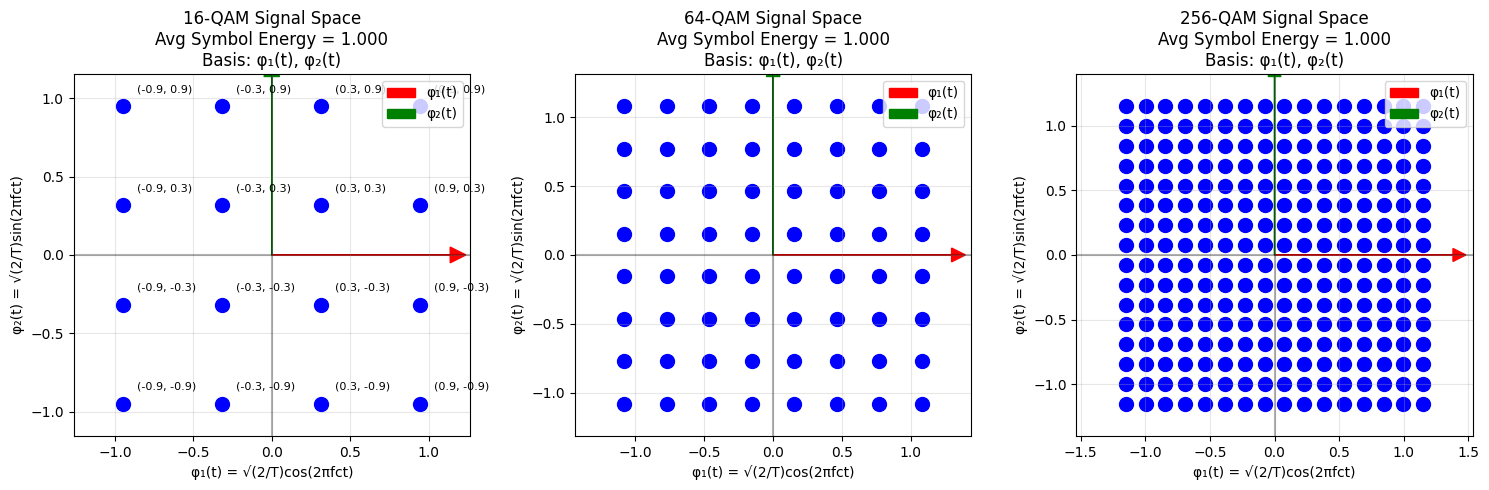

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_qam_signal_space(M):
    """Plot QAM signal space with basis function representation"""
    # Calculate number of points in each dimension
    k = int(np.sqrt(M))

    # Calculate scale factor for unit average energy
    scale = np.sqrt(3/(2*(M-1)))

    # Generate amplitude levels
    levels = np.linspace(-(k-1), k-1, k) * scale

    # Create grid of points
    X, Y = np.meshgrid(levels, levels)

    plt.scatter(X.flatten(), Y.flatten(), c='blue', s=100)

    # Add arrows for basis functions
    max_level = max(abs(levels))
    plt.arrow(0, 0, max_level*1.2, 0, head_width=0.1, head_length=0.1,
             fc='r', ec='r', label='φ₁(t)')
    plt.arrow(0, 0, 0, max_level*1.2, head_width=0.1, head_length=0.1,
             fc='g', ec='g', label='φ₂(t)')

    # Add labels for some points
    if M == 16:  # Show labels for 16-QAM
        for i, x in enumerate(levels):
            for j, y in enumerate(levels):
                plt.annotate(f'({x:.1f}, {y:.1f})',
                           (x, y), xytext=(10, 10),
                           textcoords='offset points',
                           fontsize=8)

    # Add grid and labels
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.xlabel('φ₁(t) = √(2/T)cos(2πfct)')
    plt.ylabel('φ₂(t) = √(2/T)sin(2πfct)')

    # Set equal aspect ratio and limits
    plt.axis('equal')
    limit = max_level * 1.5
    plt.xlim(-limit, limit)
    plt.ylim(-limit, limit)

    Es = np.mean(X.flatten()**2 + Y.flatten()**2)
    plt.title(f'{M}-QAM Signal Space\n' +
             f'Avg Symbol Energy = {Es:.3f}\n' +
             f'Basis: φ₁(t), φ₂(t)')
    plt.legend()

    # Print signal analysis
    print(f"\n{M}-QAM Signal Analysis:")
    print("-" * 50)
    print("Basis functions:")
    print("φ₁(t) = √(2/T)cos(2πfct)")
    print("φ₂(t) = √(2/T)sin(2πfct)")
    print(f"\nAmplitude levels: {levels.tolist()}")
    print(f"Number of bits: {int(np.log2(M))}")
    print(f"Average symbol energy: {Es:.3f}")
    print(f"Scale factor: {scale:.3f}")

    # Calculate distances
    d_min = 2 * scale
    d_max = 2 * max_level
    print(f"\nDistances:")
    print(f"Minimum distance: {d_min:.3f}")
    print(f"Maximum distance: {d_max:.3f}")

# Create plots for different M values
plt.figure(figsize=(15, 5))
for idx, M in enumerate([16, 64, 256], 1):
    plt.subplot(1, 3, idx)
    plot_qam_signal_space(M)

plt.tight_layout()
plt.show()

## Symbol Energy Calculation


16-QAM Energy Analysis:
--------------------------------------------------
Amplitude levels: [-0.9486832980505138, -0.31622776601683794, 0.31622776601683794, 0.9486832980505138]

Energy Statistics:
Average Symbol Energy: 1.000
Minimum Symbol Energy: 0.200
Maximum Symbol Energy: 1.800
Peak-to-Average Ratio: 1.800

Energy Distribution:
Energy 0.200: 4 symbols
Energy 1.000: 8 symbols
Energy 1.800: 4 symbols

64-QAM Energy Analysis:
--------------------------------------------------
Amplitude levels: [-1.0801234497346435, -0.7715167498104596, -0.4629100498862757, -0.1543033499620919, 0.1543033499620919, 0.4629100498862757, 0.7715167498104596, 1.0801234497346435]

Energy Statistics:
Average Symbol Energy: 1.000
Minimum Symbol Energy: 0.048
Maximum Symbol Energy: 2.333
Peak-to-Average Ratio: 2.333

Energy Distribution:
Energy 0.048: 4 symbols
Energy 0.238: 8 symbols
Energy 0.429: 4 symbols
Energy 0.619: 8 symbols
Energy 0.810: 8 symbols
Energy 1.190: 12 symbols
Energy 1.381: 8 symbols
Energ

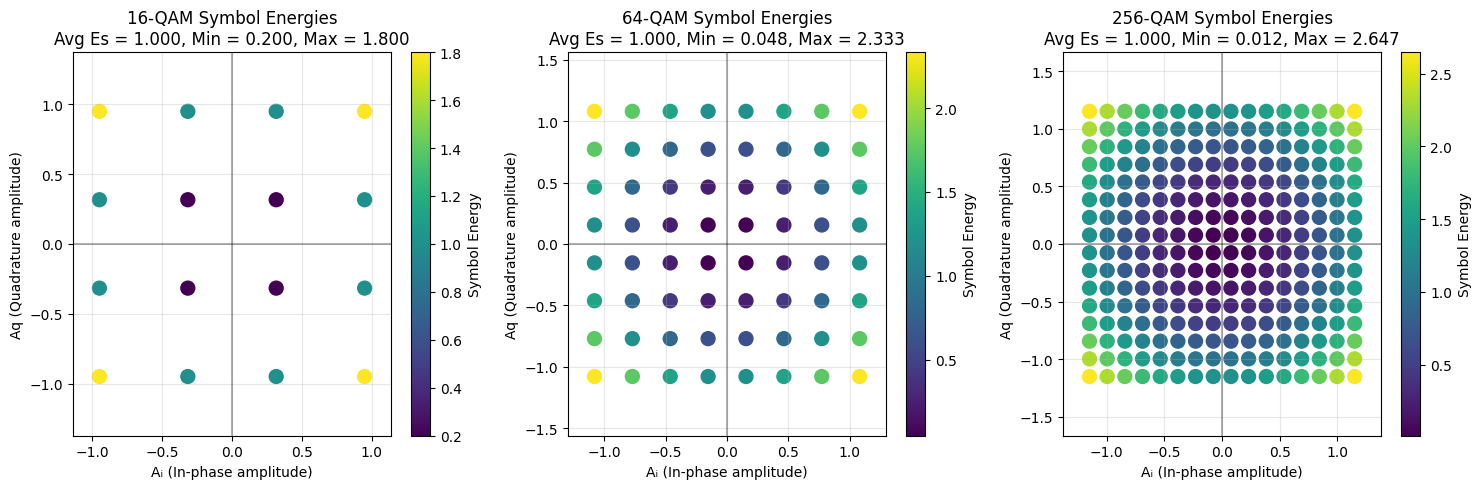

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_qam_energy(M):
    """Calculate symbol energies for M-QAM"""
    # Number of levels in each dimension
    k = int(np.sqrt(M))

    # Generate amplitude levels
    # For unit average energy
    scale = np.sqrt(3/(2*(M-1)))
    levels = np.linspace(-(k-1), k-1, k) * scale

    # Calculate energies for all constellation points
    Ai, Aq = np.meshgrid(levels, levels)
    energies = Ai**2 + Aq**2

    return levels, energies

def plot_qam_energies(M):
    """Visualize symbol energies in constellation"""
    levels, energies = calculate_qam_energy(M)

    # Plot constellation with energy-based colors
    plt.scatter(Ai.flatten(), Aq.flatten(),
               c=energies.flatten(), cmap='viridis',
               s=100)

    # Add colorbar
    plt.colorbar(label='Symbol Energy')

    # Add grid and labels
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.xlabel('Aᵢ (In-phase amplitude)')
    plt.ylabel('Aq (Quadrature amplitude)')

    # Set equal aspect ratio
    plt.axis('equal')
    limit = max(abs(levels)) * 1.2
    plt.xlim(-limit, limit)
    plt.ylim(-limit, limit)

    # Calculate statistics
    avg_energy = np.mean(energies)
    min_energy = np.min(energies)
    max_energy = np.max(energies)

    plt.title(f'{M}-QAM Symbol Energies\n' +
             f'Avg Es = {avg_energy:.3f}, Min = {min_energy:.3f}, Max = {max_energy:.3f}')

    # Print analysis
    print(f"\n{M}-QAM Energy Analysis:")
    print("-" * 50)
    print(f"Amplitude levels: {levels.tolist()}")
    print(f"\nEnergy Statistics:")
    print(f"Average Symbol Energy: {avg_energy:.3f}")
    print(f"Minimum Symbol Energy: {min_energy:.3f}")
    print(f"Maximum Symbol Energy: {max_energy:.3f}")
    print(f"Peak-to-Average Ratio: {max_energy/avg_energy:.3f}")

    # Calculate energy distribution
    unique_energies = np.unique(energies.round(decimals=6))
    print("\nEnergy Distribution:")
    for e in unique_energies:
        count = np.sum(np.isclose(energies, e))
        print(f"Energy {e:.3f}: {count} symbols")

# Create plots for different M values
plt.figure(figsize=(15, 5))
for idx, M in enumerate([16, 64, 256], 1):
    plt.subplot(1, 3, idx)
    levels, energies = calculate_qam_energy(M)
    Ai, Aq = np.meshgrid(levels, levels)
    plot_qam_energies(M)

plt.tight_layout()
plt.show()

## Energy Normalization

Theoretical d for unit average energy: 0.316

16-QAM Energy Analysis (d = 0.316):
--------------------------------------------------
Amplitude levels: [-0.9486832980505138, -0.31622776601683794, 0.31622776601683794, 0.9486832980505138]

Energy Distribution:
Energy 0.200: 4 symbols
Energy 1.000: 8 symbols
Energy 1.800: 4 symbols

Average Symbol Energy: 1.000


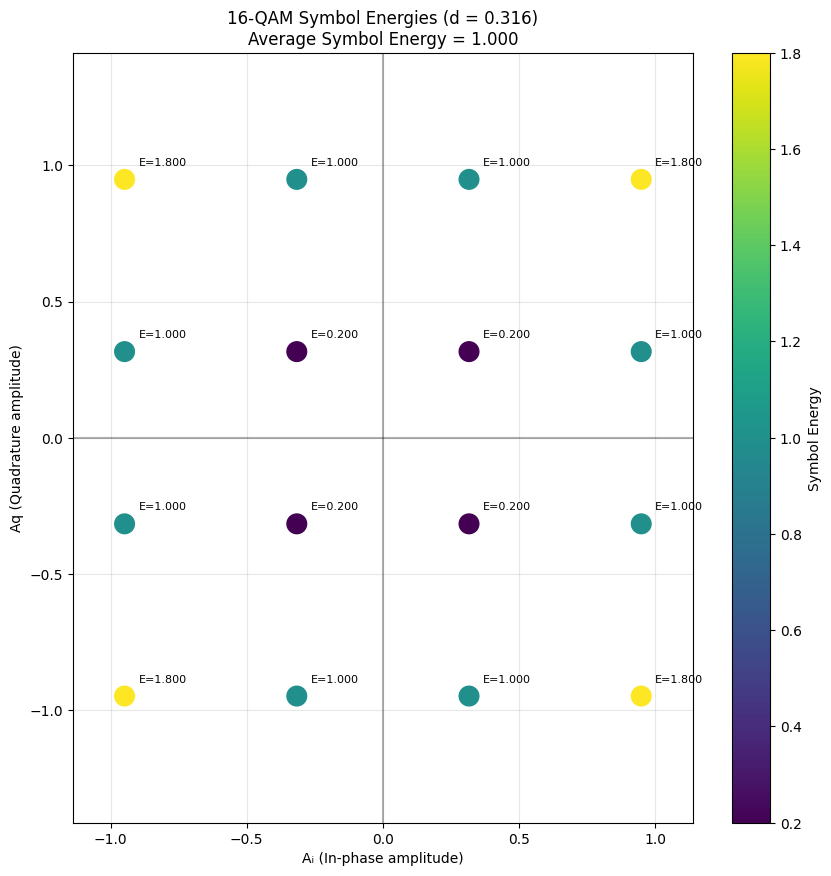


Alternative scale factor: 0.316
Resulting average energy: 1.000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_16qam_energy(d):
    """Calculate average energy for 16-QAM with scale factor d"""
    # Generate amplitude levels
    levels = np.array([-3*d, -d, d, 3*d])

    # Create all combinations
    Ai, Aq = np.meshgrid(levels, levels)

    # Calculate energies
    energies = Ai**2 + Aq**2

    # Calculate average
    avg_energy = np.mean(energies)

    return levels, energies, avg_energy

def plot_16qam_energies(d):
    """Plot 16-QAM constellation with energies"""
    levels, energies, avg_energy = calculate_16qam_energy(d)
    Ai, Aq = np.meshgrid(levels, levels)

    plt.figure(figsize=(10, 10))

    # Plot constellation points with energy-based colors
    scatter = plt.scatter(Ai, Aq, c=energies, cmap='viridis', s=200)
    plt.colorbar(scatter, label='Symbol Energy')

    # Annotate points with their energies
    for i in range(len(levels)):
        for j in range(len(levels)):
            plt.annotate(f'E={energies[i,j]:.3f}',
                        (Ai[i,j], Aq[i,j]),
                        xytext=(10, 10),
                        textcoords='offset points',
                        fontsize=8)

    # Add grid and labels
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.xlabel('Aᵢ (In-phase amplitude)')
    plt.ylabel('Aq (Quadrature amplitude)')

    # Set equal aspect ratio
    plt.axis('equal')
    limit = max(abs(levels)) * 1.2
    plt.xlim(-limit, limit)
    plt.ylim(-limit, limit)

    plt.title(f'16-QAM Symbol Energies (d = {d:.3f})\n' +
             f'Average Symbol Energy = {avg_energy:.3f}')

    # Print analysis
    print(f"\n16-QAM Energy Analysis (d = {d:.3f}):")
    print("-" * 50)
    print(f"Amplitude levels: {levels.tolist()}")
    print(f"\nEnergy Distribution:")
    unique_energies = np.unique(energies.round(decimals=6))
    for e in unique_energies:
        count = np.sum(np.isclose(energies, e))
        print(f"Energy {e:.3f}: {count} symbols")
    print(f"\nAverage Symbol Energy: {avg_energy:.3f}")

# Calculate theoretical d for unit average energy
d_theoretical = 1/np.sqrt(10)
print(f"Theoretical d for unit average energy: {d_theoretical:.3f}")

# Plot constellation with this d
plot_16qam_energies(d_theoretical)
plt.show()

# Verify with alternative scale factor used in previous example
d_alt = np.sqrt(3/(2*(16-1)))
print(f"\nAlternative scale factor: {d_alt:.3f}")
_, _, avg_energy_alt = calculate_16qam_energy(d_alt)
print(f"Resulting average energy: {avg_energy_alt:.3f}")


16-QAM Maximum Distance Analysis:
--------------------------------------------------
Scale factor (d): 0.316
Constellation size (√M): 4
Corner coordinates: (-0.949, -0.949) to (0.949, 0.949)
X component (ΔX): 1.897
Y component (ΔY): 1.897
Maximum distance (measured): 2.683
Maximum distance (theoretical): 2√2d(√16-1) = 2.683

Pythagoras verification:
√(ΔX² + ΔY²) = √(1.897² + 1.897²)
               = √(7.200)
               = 2.683


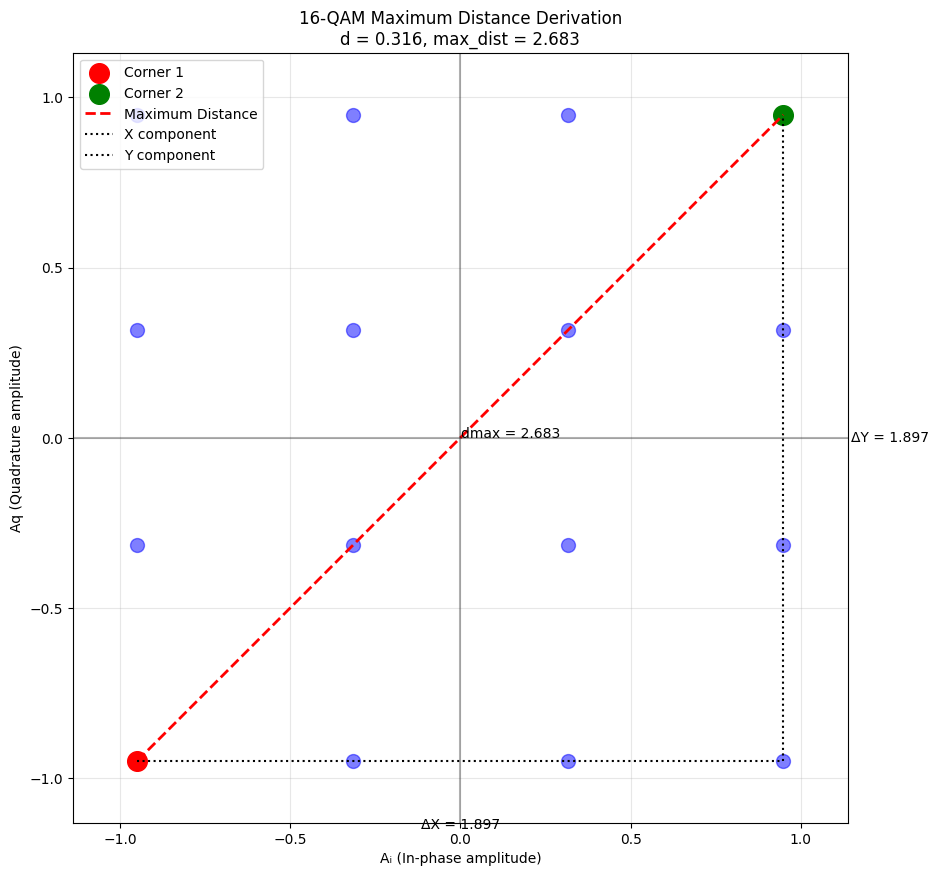

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_max_distance_derivation(M):
    """Visualize maximum distance derivation for M-QAM"""
    k = int(np.sqrt(M))
    d = np.sqrt(3/(2*(M-1)))

    # Generate constellation points
    levels = np.linspace(-(k-1), k-1, k) * d
    Ai, Aq = np.meshgrid(levels, levels)

    plt.figure(figsize=(10, 10))

    # Plot constellation points
    plt.scatter(Ai.flatten(), Aq.flatten(), c='blue', s=100, alpha=0.5)

    # Highlight corner points
    corner1 = np.array([-(k-1)*d, -(k-1)*d])
    corner2 = np.array([(k-1)*d, (k-1)*d])
    plt.scatter([corner1[0]], [corner1[1]], c='red', s=200, label='Corner 1')
    plt.scatter([corner2[0]], [corner2[1]], c='green', s=200, label='Corner 2')

    # Draw maximum distance line
    plt.plot([corner1[0], corner2[0]], [corner1[1], corner2[1]],
             'r--', linewidth=2, label='Maximum Distance')

    # Add components
    plt.plot([corner1[0], corner2[0]], [corner1[1], corner1[1]],
             'k:', label='X component')
    plt.plot([corner2[0], corner2[0]], [corner1[1], corner2[1]],
             'k:', label='Y component')

    # Calculate distances
    dx = 2*(k-1)*d
    max_dist = np.sqrt((corner2[0]-corner1[0])**2 + (corner2[1]-corner1[1])**2)
    theoretical_max = 2*np.sqrt(2)*(np.sqrt(M)-1)*d

    # Add annotations
    plt.annotate(f'ΔX = {dx:.3f}',
                xy=(0, corner1[1]),
                xytext=(0, corner1[1]-0.2),
                ha='center')

    plt.annotate(f'ΔY = {dx:.3f}',
                xy=(corner2[0], 0),
                xytext=(corner2[0]+0.2, 0),
                va='center')

    plt.annotate(f'dmax = {max_dist:.3f}',
                xy=((corner1[0]+corner2[0])/2, (corner1[1]+corner2[1])/2),
                xytext=(0.2, 0.2), textcoords='offset points')

    # Add grid and labels
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.xlabel('Aᵢ (In-phase amplitude)')
    plt.ylabel('Aq (Quadrature amplitude)')

    # Set equal aspect ratio
    plt.axis('equal')
    limit = max(abs(levels)) * 1.2
    plt.xlim(-limit, limit)
    plt.ylim(-limit, limit)

    plt.title(f'{M}-QAM Maximum Distance Derivation\n' +
             f'd = {d:.3f}, max_dist = {max_dist:.3f}')
    plt.legend()

    # Print analysis
    print(f"\n{M}-QAM Maximum Distance Analysis:")
    print("-" * 50)
    print(f"Scale factor (d): {d:.3f}")
    print(f"Constellation size (√M): {k}")
    print(f"Corner coordinates: ({corner1[0]:.3f}, {corner1[1]:.3f}) to ({corner2[0]:.3f}, {corner2[1]:.3f})")
    print(f"X component (ΔX): {dx:.3f}")
    print(f"Y component (ΔY): {dx:.3f}")
    print(f"Maximum distance (measured): {max_dist:.3f}")
    print(f"Maximum distance (theoretical): 2√2d(√{M}-1) = {theoretical_max:.3f}")

    # Pythagoras verification
    print("\nPythagoras verification:")
    print(f"√(ΔX² + ΔY²) = √({dx:.3f}² + {dx:.3f}²)")
    print(f"               = √({2*dx**2:.3f})")
    print(f"               = {max_dist:.3f}")

# Plot for 16-QAM
M = 16
plot_max_distance_derivation(M)
plt.show()

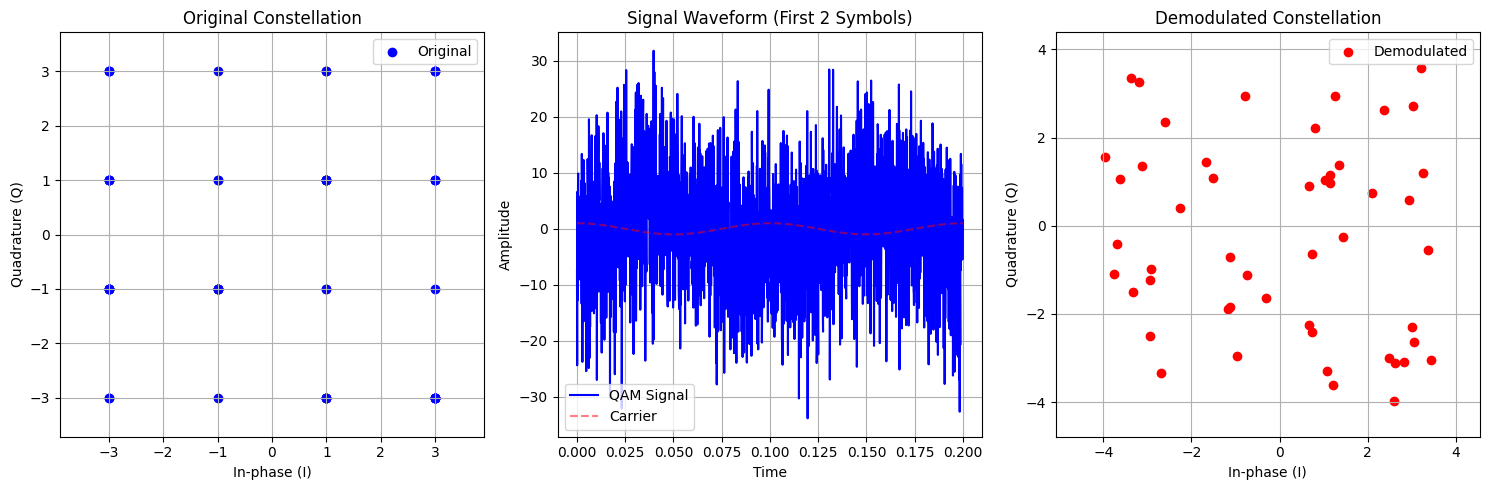


Statistical Analysis:
--------------------------------------------------
Number of symbols: 50
Average I error: 0.319788
Average Q error: 0.367319
Maximum I error: 0.970510
Maximum Q error: 0.984548

First 5 Symbols:
--------------------------------------------------
Symbol 0:
  Original:    I=-3.000, Q=-3.000
  Demodulated: I=-2.931, Q=-2.490
Symbol 1:
  Original:    I=-3.000, Q= 1.000
  Demodulated: I=-3.622, Q= 1.057
Symbol 2:
  Original:    I= 3.000, Q=-3.000
  Demodulated: I= 2.826, Q=-3.086
Symbol 3:
  Original:    I= 3.000, Q= 3.000
  Demodulated: I= 3.210, Q= 3.589
Symbol 4:
  Original:    I=-1.000, Q=-1.000
  Demodulated: I=-1.132, Q=-0.715


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_mqam_symbols(M, num_symbols):
    """Generate random M-QAM symbols"""
    # Calculate number of levels in each dimension (I and Q)
    L = int(np.sqrt(M))

    # Generate levels for I and Q
    levels = np.linspace(-3, 3, L)

    # Generate random indices
    i_idx = np.random.randint(0, L, num_symbols)
    q_idx = np.random.randint(0, L, num_symbols)

    # Map to I/Q values
    symbols_i = levels[i_idx]
    symbols_q = levels[q_idx]

    return symbols_i, symbols_q

def coherent_demodulate(received_signal, t, fc, samples_per_symbol):
    """Perform coherent demodulation with correct period integration"""
    omega = 2*np.pi*fc

    # Generate carriers
    i_carrier = np.cos(omega*t)
    q_carrier = np.sin(omega*t)

    # Mix signals
    i_mixed = received_signal * i_carrier
    q_mixed = received_signal * q_carrier

    # Integrate over symbol period
    i_shaped = i_mixed.reshape(-1, samples_per_symbol)
    q_shaped = q_mixed.reshape(-1, samples_per_symbol)

    i_demod = 2 * np.mean(i_shaped, axis=1)
    q_demod = -2 * np.mean(q_shaped, axis=1)

    return i_demod, q_demod

# Parameters
M = 16  # 16-QAM
num_symbols = 50  # More symbols for better visualization
fc = 10  # Carrier frequency
samples_per_symbol = 1000
noise_std = 10

# Generate random symbols
symbols_i, symbols_q = generate_mqam_symbols(M, num_symbols)

# Generate time vector and signal
t = np.arange(num_symbols * samples_per_symbol) / (fc * samples_per_symbol)
i_samples = np.repeat(symbols_i, samples_per_symbol)
q_samples = np.repeat(symbols_q, samples_per_symbol)

# Generate carriers
i_carrier = np.cos(2*np.pi*fc*t)
q_carrier = np.sin(2*np.pi*fc*t)

# Create QAM signal
qam_signal = i_samples * i_carrier - q_samples * q_carrier

if noise_std > 0:
    noise = noise_std * np.random.randn(len(qam_signal))
    qam_signal = qam_signal + noise

# Demodulate
i_demod, q_demod = coherent_demodulate(qam_signal, t, fc, samples_per_symbol)

# Plot results
plt.figure(figsize=(15, 5))

# Original constellation
plt.subplot(131)
plt.scatter(symbols_i, symbols_q, c='blue', label='Original')
plt.grid(True)
plt.xlabel('In-phase (I)')
plt.ylabel('Quadrature (Q)')
plt.title('Original Constellation')
plt.axis('equal')
plt.legend()

# Signal waveform (show just a few symbols)
plt.subplot(132)
num_symbols_show = 2
t_plot = t[:num_symbols_show*samples_per_symbol]
sig_plot = qam_signal[:num_symbols_show*samples_per_symbol]
carr_plot = i_carrier[:num_symbols_show*samples_per_symbol]

plt.plot(t_plot, sig_plot, 'b-', label='QAM Signal')
plt.plot(t_plot, carr_plot, 'r--', label='Carrier', alpha=0.5)
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title(f'Signal Waveform (First {num_symbols_show} Symbols)')
plt.legend()

# Demodulated constellation
plt.subplot(133)
plt.scatter(i_demod, q_demod, c='red', label='Demodulated')
plt.grid(True)
plt.xlabel('In-phase (I)')
plt.ylabel('Quadrature (Q)')
plt.title('Demodulated Constellation')
plt.axis('equal')
plt.legend()

plt.tight_layout()
plt.show()

# Print statistical analysis
print("\nStatistical Analysis:")
print("-" * 50)
print(f"Number of symbols: {num_symbols}")
print(f"Average I error: {np.mean(np.abs(symbols_i - i_demod)):.6f}")
print(f"Average Q error: {np.mean(np.abs(symbols_q - q_demod)):.6f}")
print(f"Maximum I error: {np.max(np.abs(symbols_i - i_demod)):.6f}")
print(f"Maximum Q error: {np.max(np.abs(symbols_q - q_demod)):.6f}")

# Print first few symbols for verification
print("\nFirst 5 Symbols:")
print("-" * 50)
for i in range(min(5, num_symbols)):
    print(f"Symbol {i}:")
    print(f"  Original:    I={symbols_i[i]:>6.3f}, Q={symbols_q[i]:>6.3f}")
    print(f"  Demodulated: I={i_demod[i]:>6.3f}, Q={q_demod[i]:>6.3f}")